# Storytelling Data Visualization on Exchange Rates

The dataset we'll use describes `Euro daily exchange rates between 1999 and 2021`. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

**`Our focus in the guided part of the project will be on the exchange rate between the euro and the American dollar.`**

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

## Table of Contents

> #### 1. Data Sources
> #### 2. Read the dataset
> #### 3. Data Cleaning
> #### 4. Rolling Mean
> #### 5. Coming up with an Idea
> #### 6. Sketching a Graph
> #### 7. Coding the Graph
> #### 8. Conclusion

### Data Source

`Daria Chemkaeva` put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) — the `data source is the European Central Bank`. Note that the dataset gets regular updates — we downloaded it on January 2021.

-----------

### Read the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from datetime import datetime
from matplotlib.dates import YearLocator
from matplotlib.patches import Rectangle

#Enables Jupyter to display graphs
%matplotlib inline

In [2]:
exchange_rates = pd.read_csv("datasets/euro-daily-hist_1999_2020.csv")

In [3]:
# view first five rows
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
# view the last five row
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [5]:
# learn some basic fact about the dataset
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

From the outputs above, we see that there are `41 columns` and `5699 rows` in our dataset. There are however some columns with null values. this include but not limited to `[Slovak koruna ]`, `[Slovenian tolar ]`, `[Maltese lira ]`, etc. `38 columns` out of the 41 columns have data type `object` while the remaining `3 columns` (`[Iceland krona ]`, `[Romanian leu ]` and `[Turkish lira ]`) has a data type of `float`.

-------------

### Data Cleaning

Before we start creating data visualizations, we'll need to do a bit of data cleaning. 

In [6]:
# rename the [US dollar ] and Period\Unit columns
exchange_rates.rename(columns={"[US dollar ]":"Us_dollar", "Period\\Unit:":"Time"}, inplace=True)

# convert Time column to datetime datatype
exchange_rates["Time"] = pd.to_datetime(exchange_rates["Time"])

# sort values by time
exchange_rates.sort_values("Time", inplace=True)

# reset index and drop initial index
exchange_rates.reset_index(drop=True, inplace=True)

In [7]:
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],Us_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


Above, we did the following:

* We rename the `[US dollar ]` and `Period\Unit:` columns to something easier to type — `US_dollar` and `Time`.
* We change the Time column to a datetime data type.
* We sort the values by Time in ascending order.
* We reset the index (and drop the initial index).

In [8]:
# Isolate the Time and the US_dollar columns
euro_to_dollar = exchange_rates[["Time", "Us_dollar"]]

In [9]:
euro_to_dollar.head()

,Time,Us_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


In [10]:
euro_to_dollar["Us_dollar"].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: Us_dollar, Length: 3528, dtype: int64

In [11]:
# Drop all the rows where the - character appears in the US_dollar column
euro_to_dollar = euro_to_dollar[euro_to_dollar["Us_dollar"] != "-"]

In [12]:
# Convert the US_dollar column to a float data type
euro_to_dollar["Us_dollar"] = euro_to_dollar["Us_dollar"].astype(float)

We notice there were `62` `-` in on the Us_dollar column and we dropped these rows before proceeding to convert the data type of the `Us_dollar column` to `float`.

### Rolling Mean

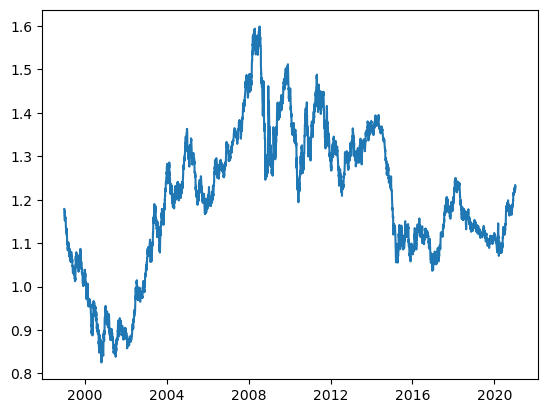

In [13]:
# line plot to visualize the evolution of euro-dollar exchange rate
plt.plot(euro_to_dollar["Time"], euro_to_dollar["Us_dollar"])
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

If we want to hide the daily variation on our graph and show only the long-term trends, we can use `the rolling mean (also known as the moving average)`.

------

In [14]:
# Compute rolling means for US_dollar column using a moving window of 30 days
euro_to_dollar["rolling_mean"] = euro_to_dollar["Us_dollar"].rolling(30).mean()

In [15]:
euro_to_dollar

,Time,Us_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


### Coming up with an Idea

To create a story, remember that we need to arrange our data into a series of events that show change.

Here are a few story ideas for our data:

* We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
* We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
* We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

-------

### Sketching a Graph

In sketching the graph, it's important to use some of the principles we've learned so far:

* Maximize the data-ink ratio.
* Create visual patterns using Gestalt principles.
* Guide the audience's attention using pre-attentive attributes.

These design principles can help you in two ways:

* They generate design options.
* They help you choose among those options.

------

### Coding the Graph

In this section, we will build two visualizations to show the evolution of the Euro-USD. This two visualization wil inlclude:
1. Euro-USD exchsnge rate between 2006 and 2010
2. EURO-USD exchange rates under George W. Bush(2001 - 2009), Barack Obama(2009 - 2017), and Donald Trump(2017 - 2021)

-----

#### 1. Euro-USD exchsnge rates between 2006 and 2010

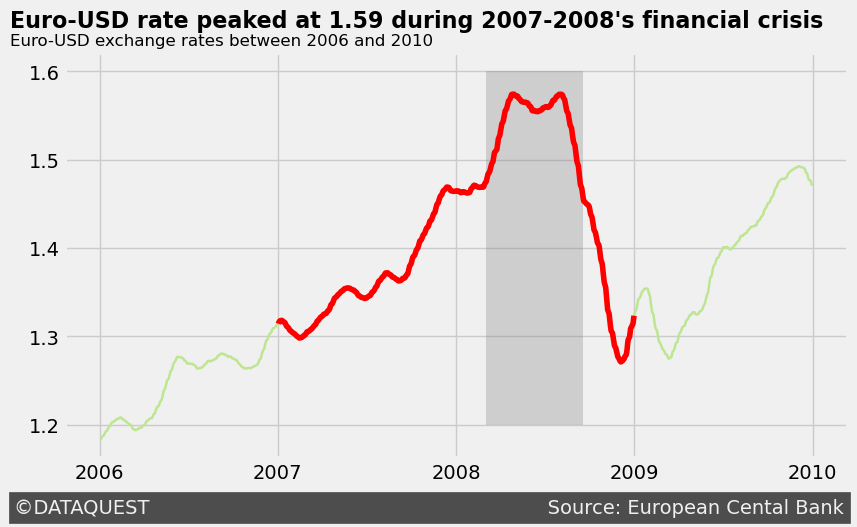

In [16]:
# create datasets for Jan 2006 t0 Dec 2009 and for Jan 2007 to Dec 2008
rate_2006_2010 = euro_to_dollar[euro_to_dollar["Time"].dt.year.between(2006,2009)]
rate_2007_2008 = euro_to_dollar[euro_to_dollar["Time"].dt.year.between(2007,2008)]

# style to use
style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(9,5))

# plot exchange rate between 2006 and 2010
ax.plot(rate_2006_2010["Time"], rate_2006_2010["rolling_mean"],
        linewidth=1.8, color="#bee692")
# plot exchange rate for 2007-2008
ax.plot(rate_2007_2008["Time"], rate_2007_2008["rolling_mean"],
        color="red")

###### Adding Title and Subtitle
ax.text(x=datetime(2005, 7, 1), y=1.65,
        s="Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold', size=16)
ax.text(x=datetime(2005, 7, 1), y=1.63,
        s="Euro-USD exchange rates between 2006 and 2010",
        size=12)

# set x-axis to display only years
years = YearLocator()
ax.xaxis.set_major_locator(years)

###### adding a box to indicate period of dollar peak
ax.add_patch(Rectangle((13940, 1.20),200, 0.40, facecolor='grey', alpha=0.3))

#### Adding a Signature at the plot
ax.text(x=datetime(2005, 7, 10), y=1.1,
        s='©DATAQUEST' + ' '*65 + 'Source: European Cental Bank',
        color = '#f0f0f0', backgroundcolor='#4d4d4d',
        size=14)

plt.show()

From the plot above, we see that there was a continuous rise in the Euro-USD exchange rate from 2006. Despite the finacial crisis of 2007-2008, the Euro-USD however saw it peak during this period, reaching a peak of 1.59 in July 2008. This uptrend continued until about mid 2008 when the  the Euro-USD rate fell drastically, however started recovering by the end of 2008.

-----------

#### 2. EURO-USD exchange rates under George W. Bush(2001 - 2009), Barack Obama(2009 - 2017), and Donald Trump(2017 - 2021)

In this section, we will proceed to visualize the Euro-USD echange rates under last 3 former American presidents.

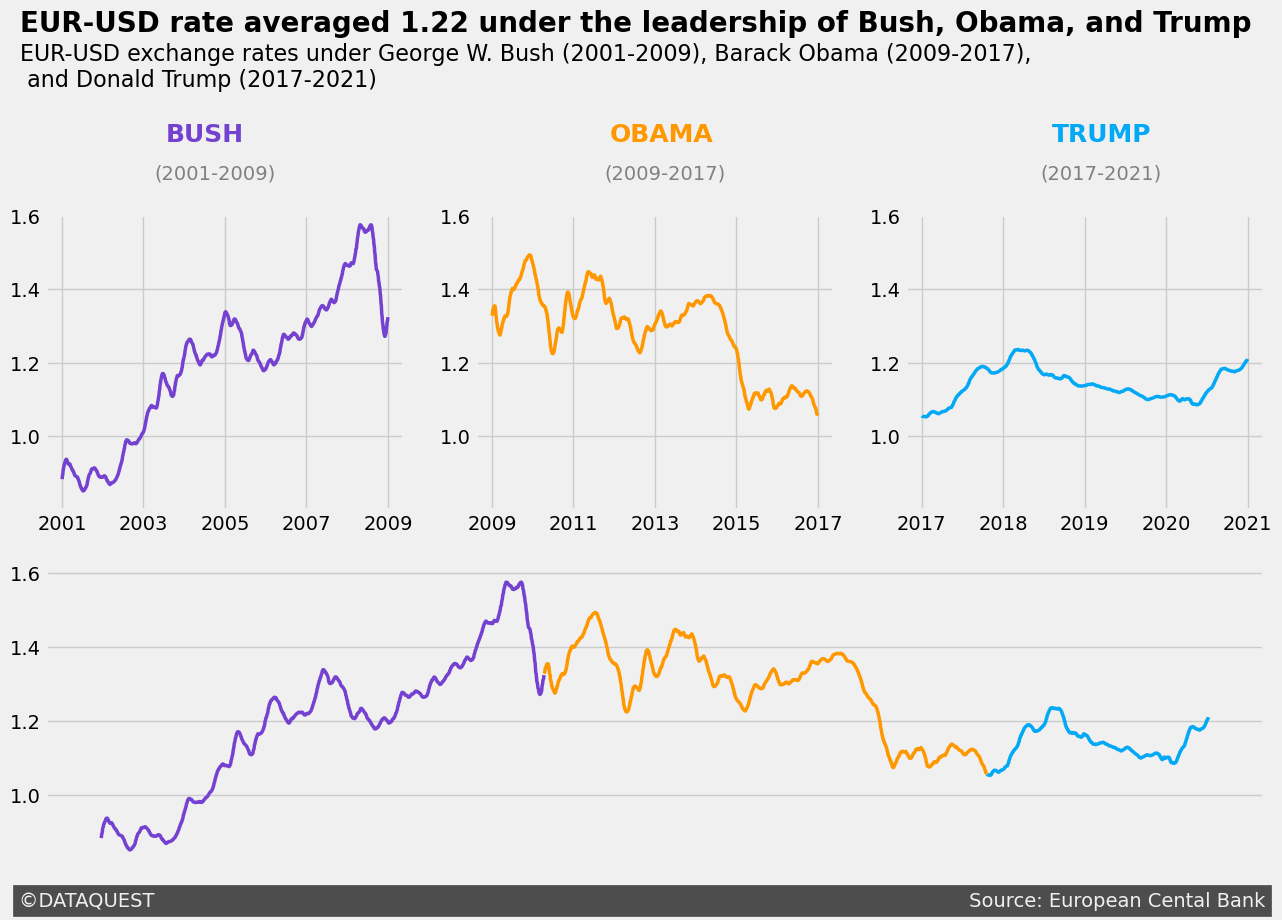

In [17]:
#### split data for various former presidents.
rate_bush = euro_to_dollar[euro_to_dollar["Time"].dt.year.between(2001,2008)]
rate_obama = euro_to_dollar[euro_to_dollar["Time"].dt.year.between(2009,2016)]
rate_trump = euro_to_dollar[euro_to_dollar["Time"].dt.year.between(2017,2020)]
rate_2001_2021 = euro_to_dollar[euro_to_dollar["Time"].dt.year.between(2001,2020)]

##### set our grids
fig = plt.figure(figsize=(14,8))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)

##### Performing our visualiztions
# plot the individual plots and the general plot
years = YearLocator() # set x-axis to display only years
axes = [ax1, ax2, ax3]
data_list = [rate_bush, rate_obama, rate_trump]
colors = ["#7441D0", "#ff9800", "#03a9f4"]
for ax, data, color in zip(axes, data_list, colors):
    ax.plot(data["Time"], data["rolling_mean"],
             linewidth=2.5,color=color)
    ax4.plot(data["Time"], data["rolling_mean"],
             linewidth=2.5,color=color)
    ax.xaxis.set_major_locator(years)
    ax.set_ylim(0.8,1.6)

#### Customizing axes
# Customize the y_axis of the there subplots
for ax in [ax1, ax2, ax3]:
    plt.setp(ax, yticks=[1, 1.2, 1.4, 1.6])

# Customize the x_axis of the plot of bush period
ax1_tick = [datetime(2001, 1, 1), datetime(2003, 1, 1), datetime(2005, 1, 1),
      datetime(2007, 1, 1), datetime(2009, 1, 1)]
ax1.set_xticks(ax1_tick)
ax1.set_xticklabels([2001, 2003, 2005, 2007, 2009])

#Customize the x_axis of the plot of Obama's period
ax2_tick = [datetime(2009, 1, 1), datetime(2011, 1, 1), datetime(2013, 1, 1),
      datetime(2015, 1, 1), datetime(2017, 1, 1)]
ax2.set_xticks(ax2_tick)
ax2.set_xticklabels([2009, 2011, 2013, 2015, 2017])

# Reomve vertical gird line on the main plot
ax4.set_xticklabels([])    
ax4.grid(visible = False, axis="x")
      
#### Adding titles and subtitles
# Add title and subtitle on bush's plot
ax1.text(12250, 1.8, "BUSH", size=18, weight="bold", color="#7441D0") # stitle
ax1.text(12150, 1.7, "(2001-2009)", size=14, color="grey") # subtitle

# Add title and subtitle on obama's plot
ax2.text(15300, 1.8, "OBAMA", size=18, weight="bold", color="#ff9800")
ax2.text(15250, 1.7, "(2009-2017)", size=14, color="grey")
# Add title and subtitle on trump's plot
ax3.text(17750, 1.8, "TRUMP", size=18, weight="bold", color="#03a9f4")
ax3.text(17700, 1.7, "(2017-2021)", size=14, color="grey")

# Add main title and subtitle
ax1.text(10950, 2.10, "EUR-USD rate averaged 1.22 under the leadership of Bush, Obama, and Trump", size=20, weight="bold")
ax1.text(10950, 1.95, "EUR-USD exchange rates under George W. Bush (2001-2009), Barack Obama (2009-2017),\n and Donald Trump (2017-2021)", size=16)

#### Adding a Signature at the plot
ax4.text(x=10780, y=0.7,
        s='©DATAQUEST' + ' '*133 + 'Source: European Cental Bank',
        color = '#f0f0f0', backgroundcolor='#4d4d4d',
        size=14)

plt.show()

### Conclusion
Summarily, we observe that from 2001 during the presidency of president Bush, the Euro-USD rate has been on a steady uptrend. During his era, the finacial crisis of 2007-2008 set in, during which the Euro-USD saw it's peak in July 2008. Though the exchange rate started having a downtrend at the end of his mandate in late 2008, the Obama's period has seen a series of uptrend and downtrends with the Euro-USD epriencing its lowest rate in 10 years(2007-2017) at the early start of Trump's mandate.